In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

In [4]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', 
                  padding='same', strides=2, input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'), 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7719 - loss: 0.6482 - val_accuracy: 0.8698 - val_loss: 0.3596
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8852 - loss: 0.3217 - val_accuracy: 0.8847 - val_loss: 0.3220
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9031 - loss: 0.2684 - val_accuracy: 0.8986 - val_loss: 0.2833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9154 - loss: 0.2312 - val_accuracy: 0.9034 - val_loss: 0.2663
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9245 - loss: 0.2038 - val_accuracy: 0.9037 - val_loss: 0.2640
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9304 - loss: 0.1862 - val_accuracy: 0.9067 - val_loss: 0.2643
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9392 - loss: 0.1648 - val_accuracy: 0.9087 - val_loss: 0.2661
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9464 - loss: 0

In [7]:

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 1s - 3ms/step - accuracy: 0.9019 - loss: 0.3117

Test accuracy: 0.9019


In [8]:

predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


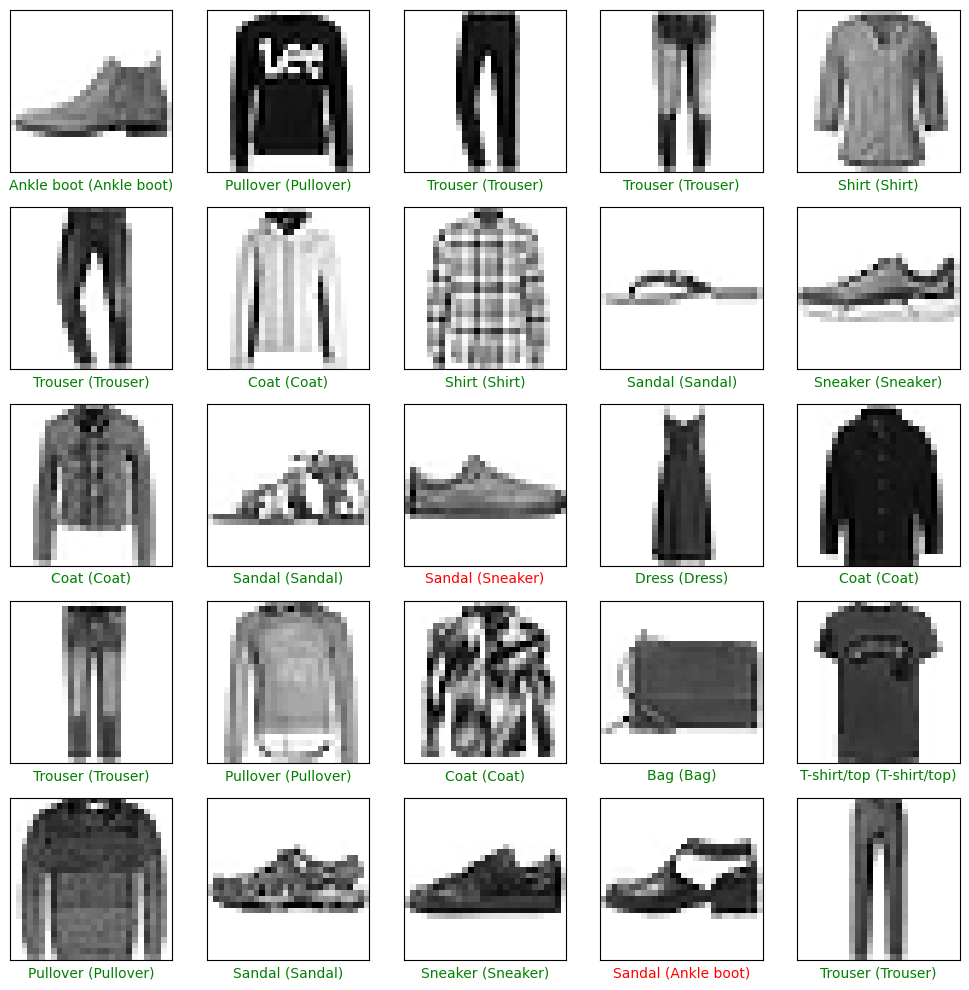

In [9]:

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.tight_layout()
plt.show()

In [10]:

print("\nNotes on padding/stride effects:")
print("- Input shape: 28x28x1 (height, width, channels)")
print("- After Conv2D with stride=2: 14x14x32 (spatial dimensions halved)")
print("- After MaxPooling2D: 7x7x32 (another 2x reduction)")
print("- 'same' padding preserves spatial dimensions when stride=1")
print("- Total reduction: 28x28 -> 7x7 (4x smaller in each dimension)")


Notes on padding/stride effects:
- Input shape: 28x28x1 (height, width, channels)
- After Conv2D with stride=2: 14x14x32 (spatial dimensions halved)
- After MaxPooling2D: 7x7x32 (another 2x reduction)
- 'same' padding preserves spatial dimensions when stride=1
- Total reduction: 28x28 -> 7x7 (4x smaller in each dimension)
